In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as anim

Queremos resolver el sistema 
$$\frac{d^2x}{dt^2}+x=0$$

## Método LeapFrog

In [58]:
TMin, TMax, N = 0.,10., 100
t = np.linspace(TMin, TMax, N)
h = (TMax-TMin)/float(N-1)

In [59]:
r0 = np.array([1.0,0]) #Condiciones iniciales. 

In [60]:
def GetE(x):
    return -x

In [61]:
def GetLeapFrog(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    t1 = np.arange(TMin - 0.5*h, TMax - 0.5*h + h, h)
    
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*GetE(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*GetE(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    #print(len(X),len(V))
    
    return X,V

In [62]:
x, v = GetLeapFrog(r0,t)

<IPython.core.display.Javascript object>


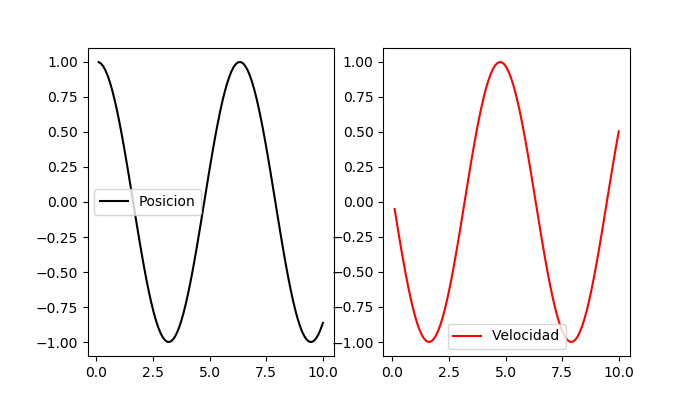

In [63]:
fig0 = plt.figure(figsize=(7,4))
ax = fig0.add_subplot(121)
ax1 = fig0.add_subplot(122)
ax.plot(t[1:],x, '-k',label='Posicion')
ax1.plot(t[1:],v, '-r',label='Velocidad')
ax.legend(loc=0)
ax1.legend(loc=0)
plt.show()

In [64]:
E = 0.5*x**2 + 0.5*v**2
meanE = np.mean(E)

## Método simpléctico de orden 4

In [66]:
w0= - (2.**(1./3.))/ (2.-(2.**(1./3.)))
w1= 1./(2-(2.**(1./3.)))
c1= w1/2.
c4=c1
c2= (w0+w1)/2.
c3=c2 
d1=w1
d3= w1
d2= w0

In [67]:
def YoshidaMethod(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    t1 = np.arange(TMin - 0.5*h, TMax - 0.5*h + h, h)
    
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador
    
    x[0] = r0[0]
    v[0] = r0[1] 

    for i in range(1,N):
        
        x1= x[i-1] + c1*v[i-1]*h
        v1= v[i-1] + d1*GetE(x1)*h
        x2= x1 + c2*v1*h
        v2= v1 + d2*GetE(x2)*h
        x3= x2 + c3*v2*h
        v3= v2 + d3*GetE(x3)*h
        
        x[i]= x3 + c4*v3*h
        v[i]= v3

    V = v[1:]
    X = x[1:]
    
    #print(len(X),len(V))
    
    return X,V

In [68]:
x1, v1 = YoshidaMethod(r0,t)

<IPython.core.display.Javascript object>


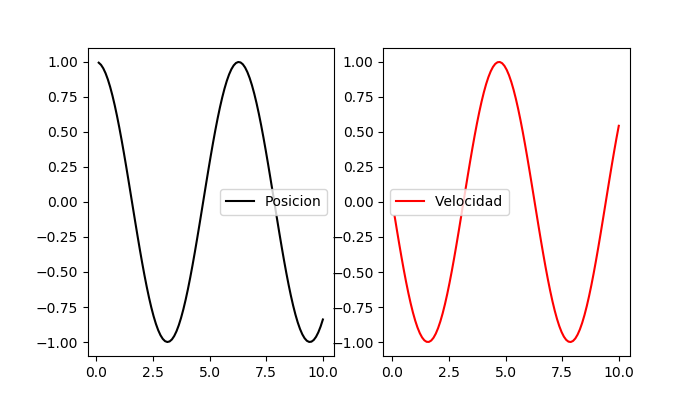

In [69]:
fig2 = plt.figure(figsize=(7,4))
ax2 = fig2.add_subplot(121)
ax3 = fig2.add_subplot(122)
ax2.plot(t[1:],x1, '-k',label='Posicion')
ax3.plot(t[1:],v1, '-r',label='Velocidad')
ax2.legend(loc=0)
ax3.legend(loc=0)
plt.show()

In [70]:
E1 = 0.5*x1**2 + 0.5*v1**2
meanE1 = np.mean(E1)

<IPython.core.display.Javascript object>


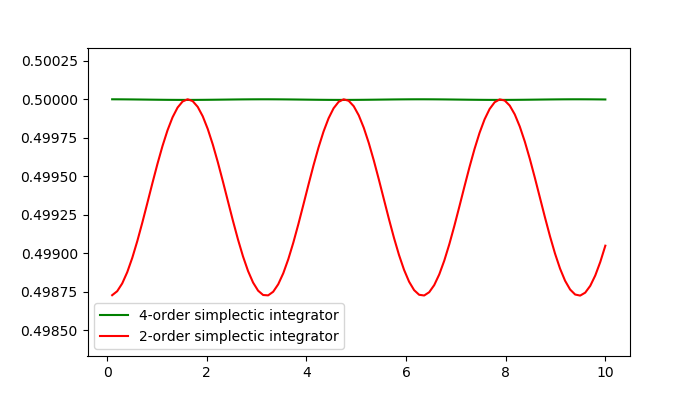

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location '1'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


In [80]:
fig4 = plt.figure(figsize=(7,4))
_ax1 = fig4.add_subplot(111)

_ax1.plot(t[1:],E1[0:],'-g', label='4-order simplectic integrator')
_ax1.plot(t[1:],E[0:],'-r', label='2-order simplectic integrator')

_ax1.set_ylim(meanE-1e-3,meanE+1e-3)
_ax1.legend(loc= "1")